In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pandas as pd
%ls

sample_data/


In [2]:
ls

sample_data/


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%ls

drive/  sample_data/


In [6]:
%cd drive/

/content/drive


In [7]:
%ls


MyDrive/


In [8]:
%cd MyDrive/

/content/drive/MyDrive


In [11]:
data = pd.read_csv('train.csv')

In [12]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
train = data.iloc[0:40000,:]
train_X = train.drop('label',axis=1)
train_Y = train.iloc[:,0]

In [14]:
val = data.iloc[40000:,:]
val_X = val.drop('label',axis=1)
val_Y = val.iloc[:,0]

In [15]:
type(val_X)

pandas.core.frame.DataFrame

In [16]:
train_X = train_X.to_numpy()
train_Y = train_Y.to_numpy()
val_X = val_X.to_numpy()

In [17]:
type(val_X)

numpy.ndarray

In [18]:
val_Y = val_Y.to_numpy()
train_X = train_X / 255.   #image normalisation
val_X = val_X/255.

In [19]:
print(train_X.shape,train_Y.shape,val_X.shape,val_Y.shape)

(40000, 784) (40000,) (2000, 784) (2000,)


In [20]:
train_X = np.reshape(train_X,(40000,28,28,1))
val_X = np.reshape(val_X,(2000,28,28,1))

In [21]:
model = keras.Sequential([
    keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.Flatten(),
    #keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    #keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(10)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [22]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [23]:
model.fit(train_X,train_Y,epochs=10,validation_data=(val_X, val_Y))

Epoch 1/10
1250/1250 [==============================] - 35s 27ms/step - loss: 0.1722 - accuracy: 0.9460 - val_loss: 0.0607 - val_accuracy: 0.9830
Epoch 2/10
1250/1250 [==============================] - 33s 27ms/step - loss: 0.0506 - accuracy: 0.9847 - val_loss: 0.0438 - val_accuracy: 0.9870
Epoch 3/10
1250/1250 [==============================] - 33s 27ms/step - loss: 0.0363 - accuracy: 0.9884 - val_loss: 0.0448 - val_accuracy: 0.9835
Epoch 4/10
1250/1250 [==============================] - 33s 26ms/step - loss: 0.0294 - accuracy: 0.9912 - val_loss: 0.0337 - val_accuracy: 0.9900
Epoch 5/10
1250/1250 [==============================] - 33s 26ms/step - loss: 0.0218 - accuracy: 0.9929 - val_loss: 0.0375 - val_accuracy: 0.9885
Epoch 6/10
1250/1250 [==============================] - 33s 26ms/step - loss: 0.0172 - accuracy: 0.9941 - val_loss: 0.0439 - val_accuracy: 0.9880
Epoch 7/10
1250/1250 [==============================] - 33s 26ms/step - loss: 0.0130 - accuracy: 0.9959 - val_loss: 0.0453 -

In [24]:
test_loss, test_acc = model.evaluate(val_X,val_Y,verbose=2)

63/63 - 0s - loss: 0.0499 - accuracy: 0.9875


In [25]:
predict_model = tf.keras.Sequential([
    model,tf.keras.layers.Softmax()
])

4


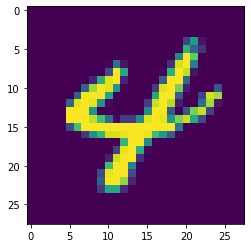

In [26]:
test_image = val_X[1234]
temp_image = test_image
temp_image = np.reshape(test_image,(28,28))
test_image = np.reshape(test_image,(1,28,28,1))
result = predict_model.predict(test_image)
print(np.argmax(result))
plt.imshow(temp_image)
plt.show()